# 준비: Import dependencies
본 예제에서는 numpy, torch, matplotlib를 사용합니다.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 데이터 생성
간단한 linear regression 학습을 위해 데이터를 생성합니다.
각 점은 노이즈를 가지고 있습니다.

x.shape = torch.Size([21, 1])
y.shape = torch.Size([21, 1])


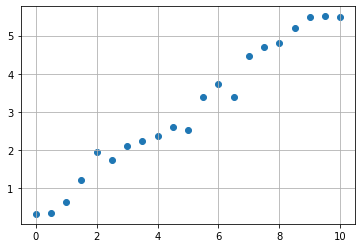

In [ ]:
x = np.linspace(0,10,21)
y = 0.5 * x + np.random.rand(len(x))

x = torch.from_numpy(x).view(-1,1).float()
y = torch.from_numpy(y).view(-1,1).float()

print("x.shape =", x.shape)
print("y.shape =", y.shape)

plt.scatter(x, y)
plt.grid()
plt.show()

# Linear Regression 모델 생성
아주 간단한, 1개의 입력과 1개의 출력으로 구성된 모델을 생성합니다.
파라미터의 개수는 2개입니다. (weight 1, bias 1)

In [ ]:
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(model)
print(model.weight) # weight 값 출력
print(model.bias) # bias 값 출력

criterion = nn.MSELoss() # Loss 함수로 MSE를 사용
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001) # Gradient Descent 기반의 optimizer 사용

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[-0.1013]], requires_grad=True)
Parameter containing:
tensor([-0.6293], requires_grad=True)


# display_result 함수 선언
linear regression 학습이 잘 되었는지 확인하기 위해 display_result 함수를 선언합니다.
학습을 하지 않은 상태에서 regression line을 그리게 되면 데이터의 경향성과 전혀 다른 직선을 보여줍니다.

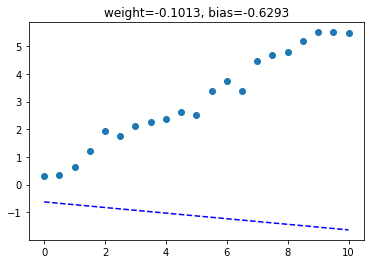

In [ ]:
def display_results(model, x, y):
    prediction = model(x)
    loss = criterion(input=prediction, target=y)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'b--')
    plt.title('weight={:.4}, bias={:.4}'.format(model.weight.data.item(), model.bias.data.item()))
    plt.show(block=False)
    plt.pause(0.5)
    plt.close()

display_results(model, x, y) # 학습 전에 plot 해보기

# 드디어 학습
각 파라미터 값을 업데이트 하는 과정은 Optimizer

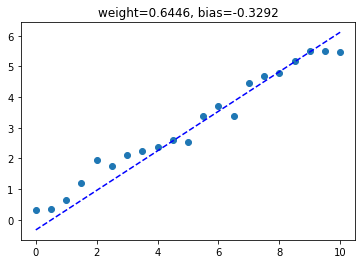

In [ ]:
for step in range(500):
    prediction = model(x) # Feed Forward 
    loss = criterion(input=prediction, target=y) # loss 계산
    # optimizer의 grad를 0으로 설정. PyTorch는 parameter들의 gradient를 계산해줄 때
    # grad가 계속 누적되므로 gradient를 다시 계산할 때에는 0으로 세팅.
    optimizer.zero_grad() 
    loss.backward() # backpropagation (gradient 계산)
    optimizer.step() # parameter 업데이트
    # if step % 10 == 0:
    #     display_results(model, x, y)

display_results(model, x, y)

# 수고하셨습니다